In [1]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf

from client.image_data_generator import ImageDataGenerator

In [2]:
DATASET_PATH = "./open-images/"
TEST_DATASET_PATH = "./open-images-test/"
MASK_PATH = "./open-images-mask/mask.mat"

EMBEDDING_FEATURE_DIM = 1024

EPOCHS = 10
BATCH_SIZE = 8

In [3]:
train_data = ImageDataGenerator(dataset_path=DATASET_PATH, mask_path=MASK_PATH)
test_data = ImageDataGenerator(dataset_path=TEST_DATASET_PATH, mask_path=MASK_PATH)

2023-12-03 21:47:32.926185: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-12-03 21:47:32.926215: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-12-03 21:47:32.926218: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-12-03 21:47:32.926254: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-03 21:47:32.926268: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [10]:
train_ds = tf.data.Dataset.from_generator(
    train_data,
    output_types=(tf.float32, tf.float32),
    output_shapes=(
        tf.TensorShape([EMBEDDING_FEATURE_DIM]),
        tf.TensorShape([EMBEDDING_FEATURE_DIM]),
    ),
).batch(BATCH_SIZE)


test_ds = tf.data.Dataset.from_generator(
    test_data,
    output_types=(tf.float32, tf.float32),
    output_shapes=(
        tf.TensorShape([EMBEDDING_FEATURE_DIM]),
        tf.TensorShape([EMBEDDING_FEATURE_DIM]),
    ),
).batch(1)

In [5]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.InputLayer(input_shape=(EMBEDDING_FEATURE_DIM)),
        tf.keras.layers.Dense(10, activation="relu"),
        tf.keras.layers.Dense(2, activation="relu"),
        tf.keras.layers.Dense(10, activation="relu"),
        tf.keras.layers.Dense(EMBEDDING_FEATURE_DIM),
    ]
)

model.compile(loss="mse", optimizer="adam", metrics="mse")

In [6]:
model.fit(train_ds, epochs=EPOCHS)

Epoch 1/10


2023-12-03 21:25:18.723388: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


35/35 [==============================] - 9s 194ms/step - loss: 0.1787 - mse: 0.1787
Epoch 2/10


2023-12-03 21:25:27.109565: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 6790367285291278587
2023-12-03 21:25:27.109577: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 18427243368169569117
2023-12-03 21:25:27.109583: I tensorflow/core/framework/local_rendezvous.cc:425] Local rendezvous send item cancelled. Key hash: 11545084659326205577
2023-12-03 21:25:27.109595: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 12742360006987156406
2023-12-03 21:25:27.109600: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3647400153219349696
2023-12-03 21:25:27.109607: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14699583887679099750


35/35 [==============================] - 6s 178ms/step - loss: 0.0552 - mse: 0.0552
Epoch 3/10
35/35 [==============================] - 6s 177ms/step - loss: 0.0463 - mse: 0.0463
Epoch 4/10
35/35 [==============================] - 6s 177ms/step - loss: 0.0427 - mse: 0.0427
Epoch 5/10
35/35 [==============================] - 6s 180ms/step - loss: 0.0357 - mse: 0.0357
Epoch 6/10
35/35 [==============================] - 6s 175ms/step - loss: 0.0298 - mse: 0.0298
Epoch 7/10
35/35 [==============================] - 6s 172ms/step - loss: 0.0275 - mse: 0.0275
Epoch 8/10
35/35 [==============================] - 6s 172ms/step - loss: 0.0267 - mse: 0.0267
Epoch 9/10
35/35 [==============================] - 6s 171ms/step - loss: 0.0264 - mse: 0.0264
Epoch 10/10
35/35 [==============================] - 6s 174ms/step - loss: 0.0263 - mse: 0.0263


1/1 [==============================] - 0s 22ms/step


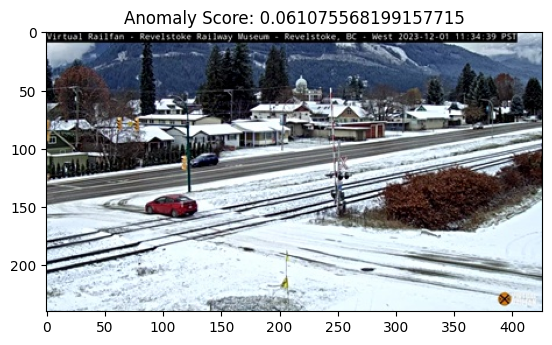

1/1 [==============================] - 0s 16ms/step


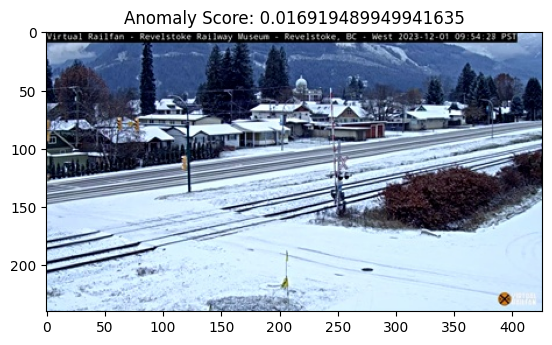

1/1 [==============================] - 0s 16ms/step


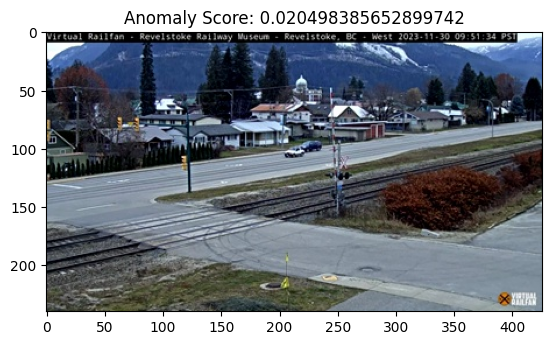

1/1 [==============================] - 0s 15ms/step


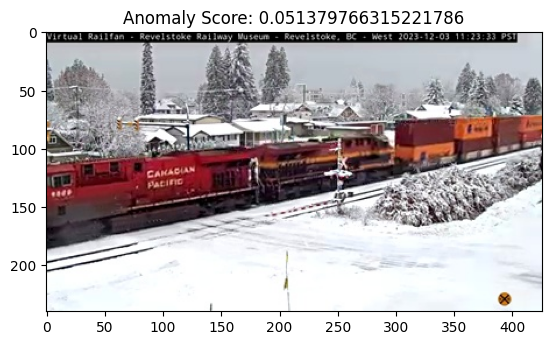

1/1 [==============================] - 0s 20ms/step


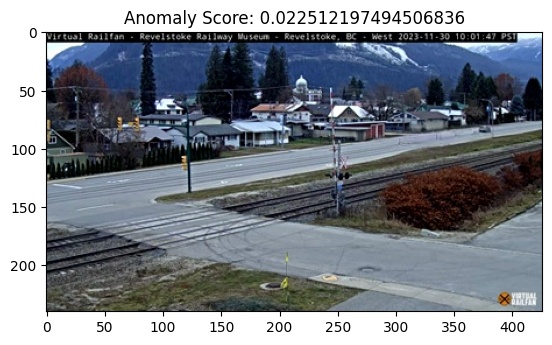

In [11]:
test_images = test_data.images

for ix, (x, y) in enumerate(test_ds):
    pred = model.predict(x)

    score = tf.reduce_mean(tf.math.square(x - pred))

    # print(score)

    plt.figure()
    plt.imshow(plt.imread(os.path.join(TEST_DATASET_PATH, test_images[ix])))
    plt.title(f"Anomaly Score: {score}")
    plt.show()